# Explore Weather

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [31]:
import pandas as pd 
import numpy as np

import random

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# import data
weather1 = pd.read_csv("../data/weather/weather_data1.csv")
weather2 = pd.read_csv("../data/weather/weather_data2.csv")

In [33]:
# TODO: concatenate your data files together and save to a new csv file ("../data/weather/weather_data.csv")
weather = pd.concat(objs=[weather1, weather2], ignore_index=True)
weather.to_csv("../data/weather/weather_data.csv", index=False)

### Data Inspection

In [34]:
# TODO: view first 5 rows of your data
weather.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais


In [35]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         18 non-null     int64  
 1   rain_max     18 non-null     float64
 2   temp_avg     18 non-null     float64
 3   temp_max     18 non-null     float64
 4   temp_min     18 non-null     float64
 5   hum_max      18 non-null     float64
 6   hum_min      18 non-null     float64
 7   wind_max     18 non-null     float64
 8   wind_avg     18 non-null     float64
 9   subdivision  18 non-null     object 
dtypes: float64(8), int64(1), object(1)
memory usage: 1.5+ KB


In [36]:
# TODO: describe your numeric columns
weather.describe()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2014.500000,3.175087,21.285831,28.198312,16.458525,96.502990,48.528039,8.469412,1.286295
std,5.338539,1.190658,0.549483,0.564714,0.891070,2.345644,3.010135,0.611327,0.399773
min,2006.000000,1.617582,20.682400,27.000000,15.268681,87.837500,44.648352,7.484426,0.812202
25%,2010.250000,2.342250,20.975602,27.811486,16.041470,96.079483,47.154325,7.906319,0.911424
50%,2014.500000,2.978022,21.126061,28.406027,16.319722,97.089241,48.450172,8.489286,1.216155
75%,2018.750000,3.718815,21.434377,28.614973,16.459066,97.553044,49.310440,8.946889,1.539160
max,2023.000000,6.670968,23.040999,29.010989,18.753125,98.500000,57.806452,9.706452,2.075207


In [37]:
# TODO: display the null values in your dataframe
weather[weather.isna().any(axis=1)]

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision


### Correlation Analysis

In [38]:
weather_corr = weather.corr(method='pearson', numeric_only=True)
display(weather_corr)

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
year,1.000000,0.004631,-0.387599,0.676439,-0.604393,0.586940,-0.362597,-0.893493,-0.951629
rain_max,0.004631,1.000000,-0.138524,-0.405107,0.322562,0.405782,0.852810,0.175290,0.092553
temp_avg,-0.387599,-0.138524,1.000000,0.002795,0.822147,-0.686180,0.096798,0.206894,0.476529
temp_max,0.676439,-0.405107,0.002795,1.000000,-0.464230,0.371833,-0.700623,-0.569396,-0.722382
temp_min,-0.604393,0.322562,0.822147,-0.464230,1.000000,-0.564110,0.624560,0.478125,0.725369
hum_max,0.586940,0.405782,-0.686180,0.371833,-0.564110,1.000000,0.074636,-0.352110,-0.671917
hum_min,-0.362597,0.852810,0.096798,-0.700623,0.624560,0.074636,1.000000,0.396377,0.464893
wind_max,-0.893493,0.175290,0.206894,-0.569396,0.478125,-0.352110,0.396377,1.000000,0.880438
wind_avg,-0.951629,0.092553,0.476529,-0.722382,0.725369,-0.671917,0.464893,0.880438,1.000000


The simplest way to visualize feature correlations is with a heatmap annotated with Pearson’s *r* values, as shown below.  
I used a triangular mask to eliminate duplicate entries and reduce visual clutter.  

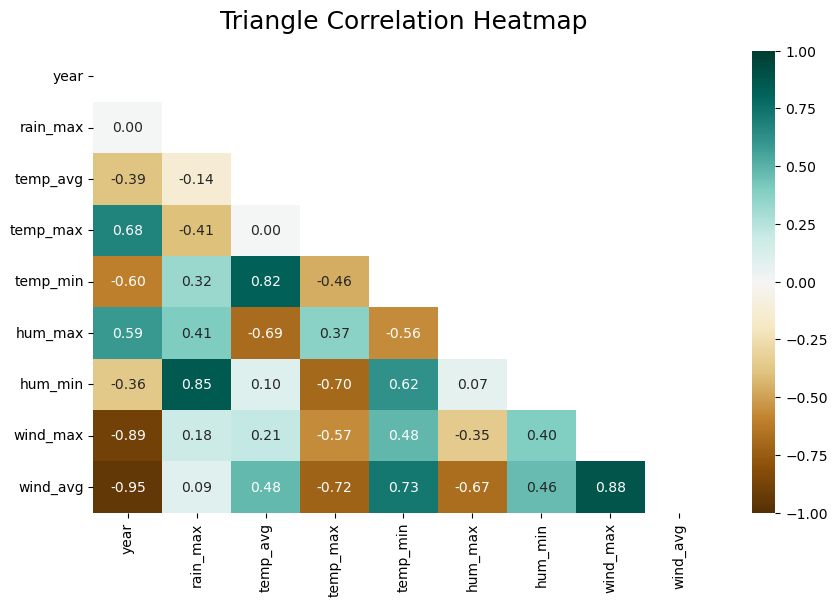

In [39]:
plt.figure(figsize=(10, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(weather_corr))

heatmap = sns.heatmap(
    data=weather_corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='BrBG',
    fmt=".2f" 
    )
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

plt.show()

We can conclude from the heatmap above:

1. **Strong negative correlations:**
   - **Year** vs **Average wind speed**: -0.95  
   - **Year** vs **Average maximum wind speed**: -0.89  

2. **Strong positive correlations:**
   - **Average wind speed** vs **Average maximum wind speed**: +0.88  
   - **Average maximum millimeters of rain** vs **Average minimum humidity**: +0.85  
   - **Average minimum temperature** vs **Average temperature**: +0.82  

#### Heatmap: Feature Correlations with Year

The heatmap below shows how each weather feature correlates with the year (2006–2023).  
Features are sorted from the strongest positive to the strongest negative Pearson *r* correlation.  

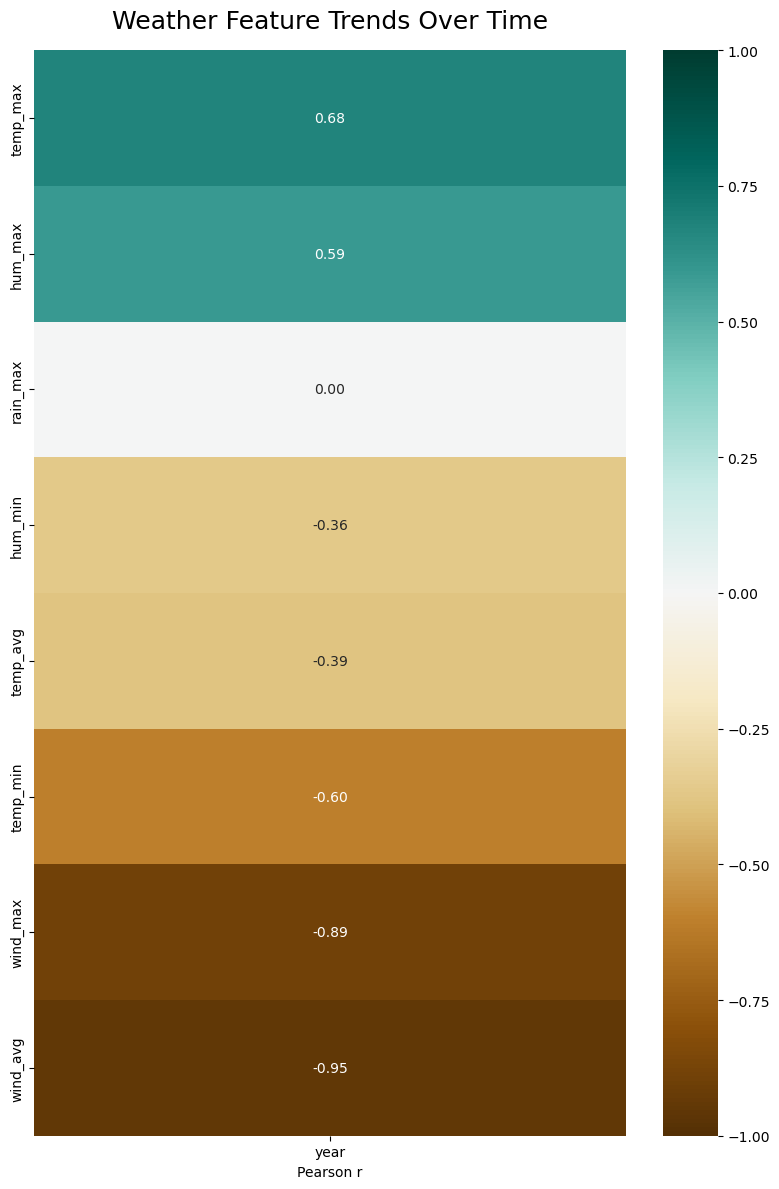

In [40]:

trends_over_time = weather_corr[['year']].drop('year').sort_values(by='year', ascending=False)
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(
    data=trends_over_time,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='BrBG',
    fmt=".2f" 
    )
heatmap.set_title('Weather Feature Trends Over Time', fontdict={'fontsize':18}, pad=16)
plt.xlabel('Pearson r')
plt.tight_layout()

plt.show()

## Data Visualization

### Univariate Analysis

I chose a line plot with a linear regression fit to highlight trends over time.  
Below is the implementation of a reusable helper function to plot time series with a regression line for multiple features.

In [41]:
# define helper function to plot time-series data with a trend line
def plot_series_with_trend(x, y, line_label, trendline_label, title, x_label, y_label, legend_loc='upper right'):
    '''
    Plots a time-series line graph with an overlaid regression trend line.
    
    Parameters:
    x (pd.Series): Series of years or time values.
    y (pd.Series): Series of numerical values to plot against time.
    line_label (str): Label for the original data line.
    trendline_label (str): Label for the regression trend line.
    title (str): Title of the plot.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    '''
    tick_positions = x[::2] # use every second year to reduce tick crowding
    tick_labels = tick_positions.apply(lambda val: "'" + str(val)[2:]) # show last 2 digits of year
    tick_labels.iloc[0] = str(tick_positions.iloc[0])  # show full year for the first tick
    tick_labels.iloc[-1] = str(tick_positions.iloc[-1]) # show full year for the last tick
    
    # random color for the trendline
    colors = ['mediumvioletred', 'darkturquoise', 'deeppink', 'goldenrod', 'darkorange', 
              'crimson', 'limegreen', 'dodgerblue', 'orchid', 'slateblue', 'springgreen', 
              'indigo', 'turquoise', 'salmon', 'hotpink', 'rebeccapurple', 'cadetblue']
    trend_color = random.choice(colors)


    fig, ax = plt.subplots()
    ax.plot(x, y, color='0.75', marker='o', linestyle='-', label=line_label) 
    sns.regplot(x=x, y=y, ax=ax, color=trend_color, scatter=False, label=trendline_label)

    ax.set_title(title, fontsize=14)
    ax.legend(loc=legend_loc)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_xticks(ticks=tick_positions)
    ax.set_xticklabels(labels=tick_labels)
    ax.grid(visible=True, linestyle='--', alpha=0.4) 

#### 1. Average Temperature Trend Over the Years

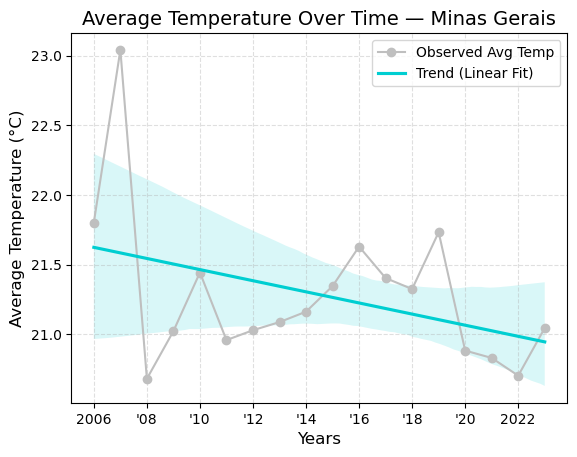

In [51]:
plot_series_with_trend(
    x=weather['year'],
    y=weather['temp_avg'],
    line_label='Observed Avg Temp',
    trendline_label='Trend (Linear Fit)',
    title='Average Temperature Over Time — Minas Gerais',
    x_label='Years',
    y_label='Average Temperature (°C)'
)

The average temperature in Minas Gerais shows a **downward** trend over the years.


#### 2. Minimum Humidity Trend Over the Years

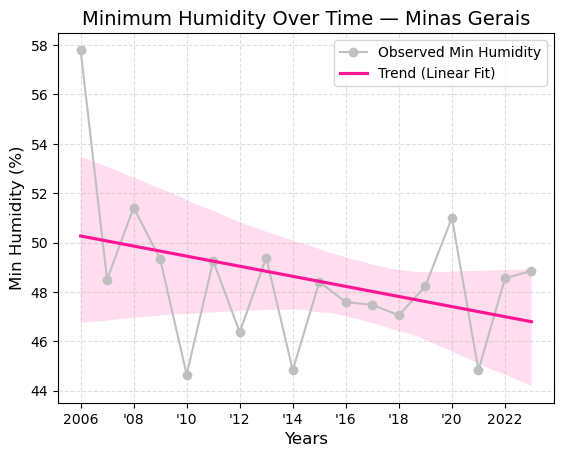

In [43]:
plot_series_with_trend(
    x=weather['year'],
    y=weather['hum_min'],
    line_label='Observed Min Humidity',
    trendline_label='Trend (Linear Fit)',
    title='Minimum Humidity Over Time — Minas Gerais',
    x_label='Years',
    y_label='Min Humidity (%)'
)

The minimum humidity in Minas Gerais shows a **downward** trend over the years.

#### 3. Average Wind Speed Trend Over the Years

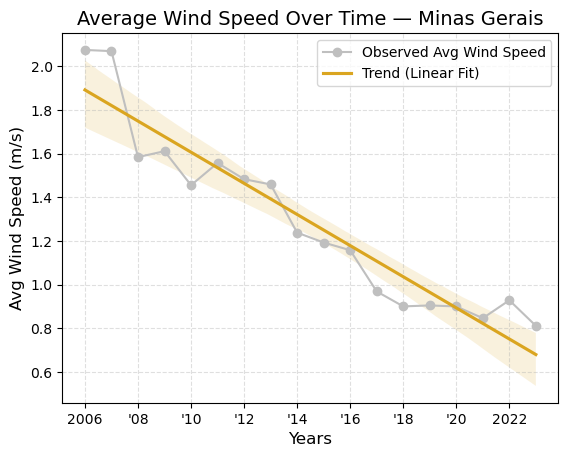

In [44]:
plot_series_with_trend(
    x=weather['year'],
    y=weather['wind_avg'],
    line_label='Observed Avg Wind Speed',
    trendline_label='Trend (Linear Fit)',
    title='Average Wind Speed Over Time — Minas Gerais',
    x_label='Years',
    y_label='Avg Wind Speed (m/s)'
)

The average wind speed in Minas Gerais shows a **downward** trend over the years.

#### 4. Highest Maximum Record Rainfall

In [45]:
max_rain_row = weather.loc[weather['rain_max'].idxmax()]

max_year = max_rain_row['year']
max_rain = round(max_rain_row['rain_max'], 2)
print(f"Highest max rainfall was {max_rain} mm in {max_year}.")

Highest max rainfall was 6.67 mm in 2006.


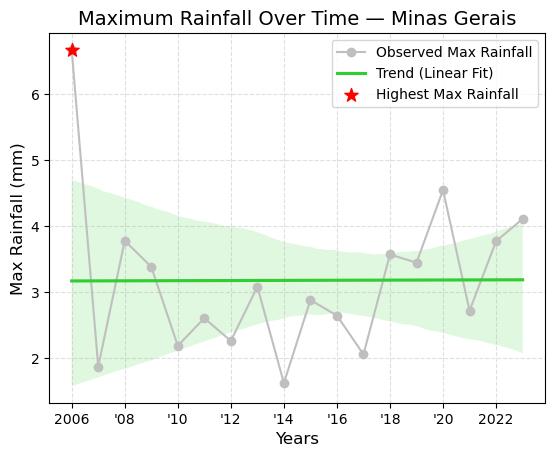

In [46]:
plot_series_with_trend(
    x=weather['year'],
    y=weather['rain_max'],
    line_label='Observed Max Rainfall',
    trendline_label='Trend (Linear Fit)',
    title='Maximum Rainfall Over Time — Minas Gerais',
    x_label='Years',
    y_label='Max Rainfall (mm)'
)

# highlight max point
plt.scatter(max_year, max_rain, color='red', s=100, marker='*', zorder=5, label='Highest Max Rainfall')
plt.legend(loc='upper right')
plt.show()

The maximum rainfall in Minas Gerais shows a **horizontal** trend over the years — peaking at **6.67 mm in 2006** (highlighted with a red star on the plot).

### Bivariate Analysis

I used a scatter plot with a linear regression line to illustrate the correlation between two features. The Pearson *r* value is displayed in the plot legend.

Below is an implementation of a reusable plotting function to apply this visualization to multiple feature pairs.

In [47]:
def plot_correlation(x, y, x_label, y_label, title):
    '''
    Plots a scatterplot with a linear regression line and displays Pearson correlation.

    Parameters:
    x (pd.Series): Variable for the x-axis
    y (pd.Series): Variable for the y-axis
    x_label (str): Label for the x-axis
    y_label (str): Label for the y-axis
    title (str): Title of the plot
    '''
    correlation = x.corr(y, method='pearson')

    colors = ['mediumvioletred', 'darkturquoise', 'deeppink', 'goldenrod', 'darkorange', 
              'crimson', 'limegreen', 'dodgerblue', 'orchid', 'slateblue', 'springgreen', 
              'tomato', 'indigo', 'turquoise', 'salmon', 'hotpink', 'rebeccapurple', 'cadetblue']
    trend_color = random.choice(colors)

    fig, ax = plt.subplots()
    sns.regplot(x=x, y=y, color=trend_color, label=f'Pearson r = {correlation:.2f}')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.legend(loc='upper left')
    ax.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()

#### 1. Correlation Between Max Rainfall and Max Humidity

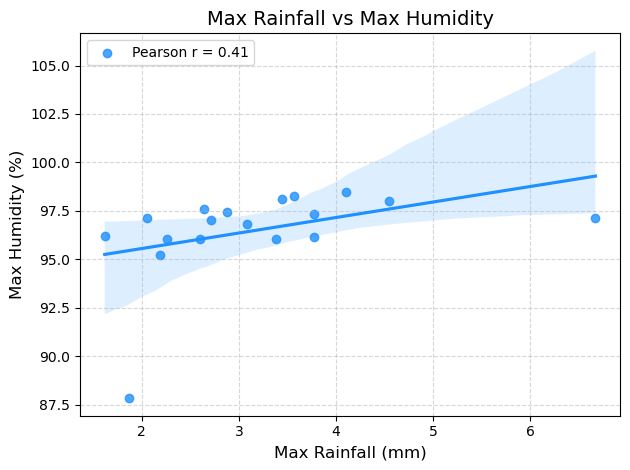

In [48]:
plot_correlation(
    x=weather['rain_max'],
    y=weather['hum_max'],
    x_label='Max Rainfall (mm)',
    y_label='Max Humidity (%)',
    title='Max Rainfall vs Max Humidity'
)

A moderate positive correlation exists between maximum rainfall and maximum humidity in Minas Gerais.

#### 2. Correlation Between Average Wind Speed and Average Temperature

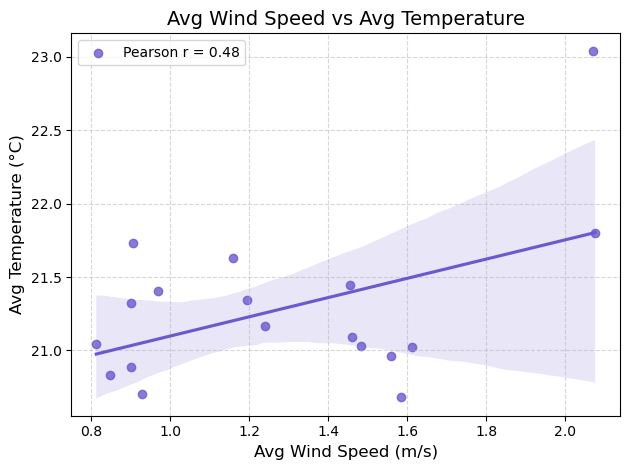

In [49]:
plot_correlation(
    x=weather['wind_avg'],
    y=weather['temp_avg'],
    x_label='Avg Wind Speed (m/s)',
    y_label='Avg Temperature (°C)',
    title='Avg Wind Speed vs Avg Temperature'
)

A moderate positive correlation exists between average wind speed and average temperature in Minas Gerais.

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is average temperature changing across the years for Minas Gerais? Is this increasing or decreasing?

> The average temperature in Minas Gerais shows a **downward** trend over the years, as seen in the time series plot with the regression line.  

How is minimum humidity changing across the years for Minas Gerais? Is this increasing or decreasing?

> The minimum humidity in Minas Gerais shows a **downward** trend over the years, as seen in the time series plot with the regression line.  

How is average wind speed changing across the years for Minas Gerais? Is this increasing or decreasing?

> The average wind speed in Minas Gerais shows a **downward** trend over the years, as seen in the time series plot with the regression line.  

Which year had the highest maximum record rainfall?

> Highest max rainfall was 6.67 mm in 2006.

What is the relationship between max rain and max humidity? How *strong* is this relationship? Use Pearson's correlation coefficient.

> There is a **moderate positive correlation** between maximum rainfall and maximum humidity in Minas Gerais.  
> This is supported by a Pearson correlation coefficient of **0.41**, and is visually reflected in the **regression line** on the scatterplot.

What is the relationship between average wind speed and average temperature? How *strong* is this relationship? Use Pearson's correlation coefficient.

> There is a **moderate positive correlation** between average wind speed and average temperature in Minas Gerais.  
> This is supported by a Pearson correlation coefficient of **0.48**, and is visually reflected in the **regression line** on the scatterplot.

## Appendix
### Pearson Correlation Coefficient

The Pearson correlation coefficient (**r**) measures the strength and direction of the linear relationship between two variables.

| Correlation (r) Range       | Interpretation                                                                  |
|----------------------------|----------------------------------------------------------------------------------|
| **r = +1**                 | The dependent variable *y* is perfectly positively correlated with *x*           |
| **+0.80 < r < +1.00**      | Strong positive correlation                                                      |
| **+0.30 < r ≤ +0.60**      | Moderate positive correlation                                                    |
| **+0.00 < r ≤ +0.30**      | Weak positive correlation                                                        |
| **r = 0**                  | No linear correlation between *x* and *y*                                        |
| **–0.30 < r < 0.00**       | Weak negative correlation                                                        |
| **–0.60 < r ≤ –0.30**      | Moderate negative correlation                                                    |
| **–1.00 < r ≤ –0.80**      | Strong negative correlation                                                      |
| **r = –1**                 | The dependent variable *y* is perfectly negatively correlated with *x*           |

**Source:** Profillidis et al. (2019)